# Capstone Project 1: Does a song/track belong in this Spotify playlist?

## Overview

The main question I want to explore is **does a song/track belong in a particular playlist**? This may be done by first analyzing the particular playlist and determining a specific ‘theme’ based on the current tracks of the playlist. Then see if a particular track fits in that overarching theme. If it does, it would be recommended that the track shouldn’t be included, but if it does it is recommended to be included.

The client would be any user interested in music, but specifically a user that needs to curate a playlist like a DJ. By implementing the above, this may help the user better curate a playlist for a particular sound, mood, or intangible ‘thing’ that describes the playlist by trying to recommend avoiding including a song that may not mesh well with the theme of the playlist.


In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import json
import helper

sns.set()

Link for token generation:
https://developer.spotify.com/console/get-current-user-playlists/?limit=&offset=

In [2]:
# Token needs to be generated everytime; will expire after a while...
token = "BQBEADNIADAPe9iJXVXszG83fZdIDxpV9tGgLtFDBMxtS1T5BZ5O4x_ZY8TO2JHZvgKXoV7sIY1Zs0UqIftMVpCambY4AuuLSc8fzaDf9JVYLqd2wSsDTXHSA_iZ71xwtjKIVY6FRUal3i-qQ3SdSKnE0dVYsPjYN2xr20CqCZsQvKKp-eJpG1JRhQkYClhwHgxS6w7yqIy1VSQrVaRHZVmO0BWOD2rcor7RhLooq8kkA8XxUCa98QQ5y3eWBhb8ROwMw1MmCzR1shkz_Hg"

## Data Wrangling

This section is primarily used for wrangling the data that can be procured through the Spotify API. Because the coding can get complex, I've decided to create a helper.py that contains python methods that are used to wrangle the data. Please see the file for the code and more information on each method to help wrangle the Spotify data.

In [ ]:
# helper.get_playlist_list(token) # get the names of the playlists to use

In [4]:
# example playlists
playlist_id_happy1 = '37i9dQZF1DXdPec7aLTmlC' # Happy Hits! | 60 songs | 3m followers
playlist_id_happy2 = '37i9dQZF1DX0UrRvztWcAU' # Wake Up Happy | 70 songs | 1m followers
playlist_id_happy3 = '37i9dQZF1DX3rxVfibe1L0' # Mood Booster | 75 songs | 3m followers
playlist_id_sad1 = '4EoPt05ztUjVaujcWbUL2Z' # Sad Songs😔 | 100 songs | 500k followers
playlist_id_sad2 = '37i9dQZF1DX7qK8ma5wgG1' # Sad Songs | 60 songs | 650k followers


The playlists above were chosen as example 'themed' playlists because they all have a good amount of songs (> 60) and a good amount of followers. The number of followers is important since it gives some validity to the playlist that it encompasses the theme it is trying to represent.

To note: There might be some overlap in songs between the similarly themed playlists.

In [5]:
df_happy1 = helper.get_df_from_playlist(playlist_id_happy1, token)

In [6]:
df_happy2 = helper.get_df_from_playlist(playlist_id_happy2, token)

In [7]:
df_happy3 = helper.get_df_from_playlist(playlist_id_happy3, token)

In [8]:
df_sad1 = helper.get_df_from_playlist(playlist_id_sad1, token)

In [9]:
df_sad2 = helper.get_df_from_playlist(playlist_id_sad2, token)

In [10]:
df_happy1.head()

,album,artist,explicit,name,popularity,acousticness,analysis_url,danceability,duration_ms,energy,...,mode,speechiness,tempo,time_signature,track_href,type,uri,valence,playlist_name,playlist_desc
id,,,,,,,,,,,,,,,,,,,,,
0aersVHlGGXcHeRvHtuaSt,Matter,[St. Lucia],False,Dancing On Glass,60,0.0189,https://api.spotify.com/v1/audio-analysis/0aer...,0.564,246333,0.945,...,1,0.0493,101.003,4,https://api.spotify.com/v1/tracks/0aersVHlGGXc...,audio_features,spotify:track:0aersVHlGGXcHeRvHtuaSt,0.399,Happy Hits!,Hits to boost your mood and fill you with happ...
6gxZLe2tUdy1U51aql0mfR,Bad Self Portraits,[Lake Street Dive],False,You Go Down Smooth,10,0.0642,https://api.spotify.com/v1/audio-analysis/6gxZ...,0.310,209400,0.794,...,1,0.0831,189.184,4,https://api.spotify.com/v1/tracks/6gxZLe2tUdy1...,audio_features,spotify:track:6gxZLe2tUdy1U51aql0mfR,0.284,Happy Hits!,Hits to boost your mood and fill you with happ...
7zkDEBSxkcBVsStS4qBFpK,Wolfgang Amadeus Phoenix,[Phoenix],False,Lisztomania,66,0.0349,https://api.spotify.com/v1/audio-analysis/7zkD...,0.635,241547,0.786,...,1,0.0377,97.540,4,https://api.spotify.com/v1/tracks/7zkDEBSxkcBV...,audio_features,spotify:track:7zkDEBSxkcBVsStS4qBFpK,0.305,Happy Hits!,Hits to boost your mood and fill you with happ...
3cAeMlAUiqsdqNuauVk0Xy,Gut Feeling,[Peter Bjorn and John],False,Gut Feeling,57,0.1150,https://api.spotify.com/v1/audio-analysis/3cAe...,0.609,182538,0.804,...,1,0.0420,131.986,4,https://api.spotify.com/v1/tracks/3cAeMlAUiqsd...,audio_features,spotify:track:3cAeMlAUiqsdqNuauVk0Xy,0.633,Happy Hits!,Hits to boost your mood and fill you with happ...
7xdPwAhj4mMqDaNxvNoYnV,Bee-Sting,[The Wombats],False,Bee-Sting,62,0.0457,https://api.spotify.com/v1/audio-analysis/7xdP...,0.650,214433,0.866,...,1,0.0343,115.001,4,https://api.spotify.com/v1/tracks/7xdPwAhj4mMq...,audio_features,spotify:track:7xdPwAhj4mMqDaNxvNoYnV,0.717,Happy Hits!,Hits to boost your mood and fill you with happ...


## Data Storytelling

For this part of the project, I wanted to see if two different playlists have features that separates the two. In the following case, I chose to explore 'happy' themed playlists versus 'sad' themed playlists as these two themes are opposite of each other. In that same vein, it would also be interesting to see if the same types of playlists' features are hardly separable, meaning that the feature values would be almost identical as they should be of the same theme. The playlists chosen above are playlists that consist of many followers and where the theme is obvious in the title of the playlist. 

Some questions that I will be asking are:

* Are there features or parameters that can differentiate two differently 'themed' playlists?
* What of similarly 'themed' playlists?


### Look at the different features comparing the two different playlists

This section takes a look at comparing different playlists with each other in regards to their features. The features chosen are ones that have values and easily comparable in a histogram plot. These features are: acousticness, danceability, energy, instrumentalness, liveness, loudness, tempo, speechiness and valence. These features were measured/evaluated by Spotify.

#### Definitions of the features

acousticness:	A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

danceability:	Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

energy:	Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

instrumentalness:  Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

liveness:	Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

loudness:	The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.

speechiness: 	Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

tempo: 	The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

valence:	A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry). 


In [11]:
def playlist_comparison_features_plots(df1, df2, title):
    """Creates plots to compare the different features (above) of two playlists"""
    label1 = df1.playlist_name[0]
    label2 = df2.playlist_name[0]
    
    fig = plt.figure(figsize=(15,15))    
    fig.suptitle(title, fontsize=40, y=.95)
    
    k = 1
    features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 
                'loudness', 'speechiness', 'valence', 'tempo']
    
    for feature in features:
        if feature=='loudness':
            bins=np.arange(-20,0,2)            
        elif feature=='tempo':
            bins=np.arange(50,250,20)
        else:
            bins = np.arange(0, 1.1, .1)
        
        plt.subplot(3,3,k)
        plt.hist(df1[feature], bins=bins, alpha=0.5, color='orange', label=label1)
        plt.hist(df2[feature], bins=bins, alpha=0.5, color='blue', label=label2)
        plt.title(feature.title())
        
        if k in [1,4,7]:
            plt.ylabel('Frequency')
        if k in [7,8,9]:
            plt.xlabel('Value')
        if k in [3,6,9]:
            plt.legend()
            
        k = k+1
    
    plt.show()

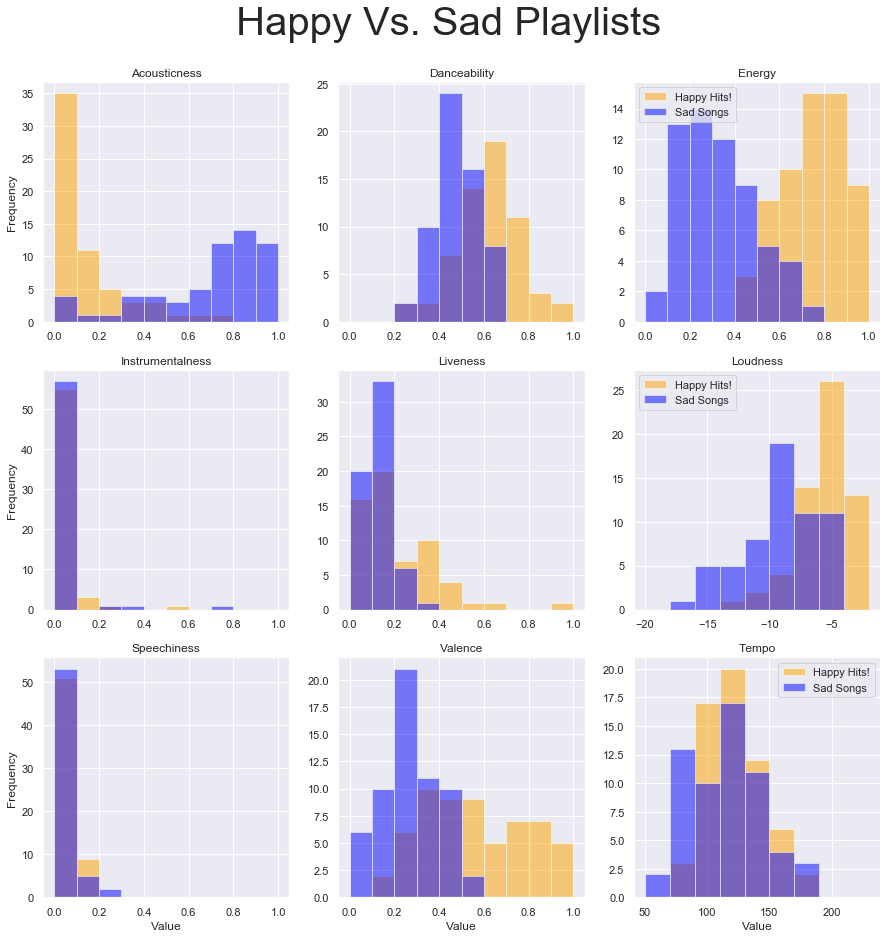

In [12]:
playlist_comparison_features_plots(df_happy1, df_sad2, 'Happy Vs. Sad Playlists')

This figure shows the comparison of two differently 'themed' playlists, specifically a happy playlist versus a sad one. According to the plots, valence, acousticness, danceability, and energy are features one can visually see that have different sample populations between the two playlists. This makes sense as one may equate happiness as full of energy and optimism while sadness envokes depression or lethargy. Also, there might be a difference in the liveness and loudness features that can be visually seen. Finally, speechiness, instrumentalness, and tempo are features that are hard to visually see any difference between the two playlists. 

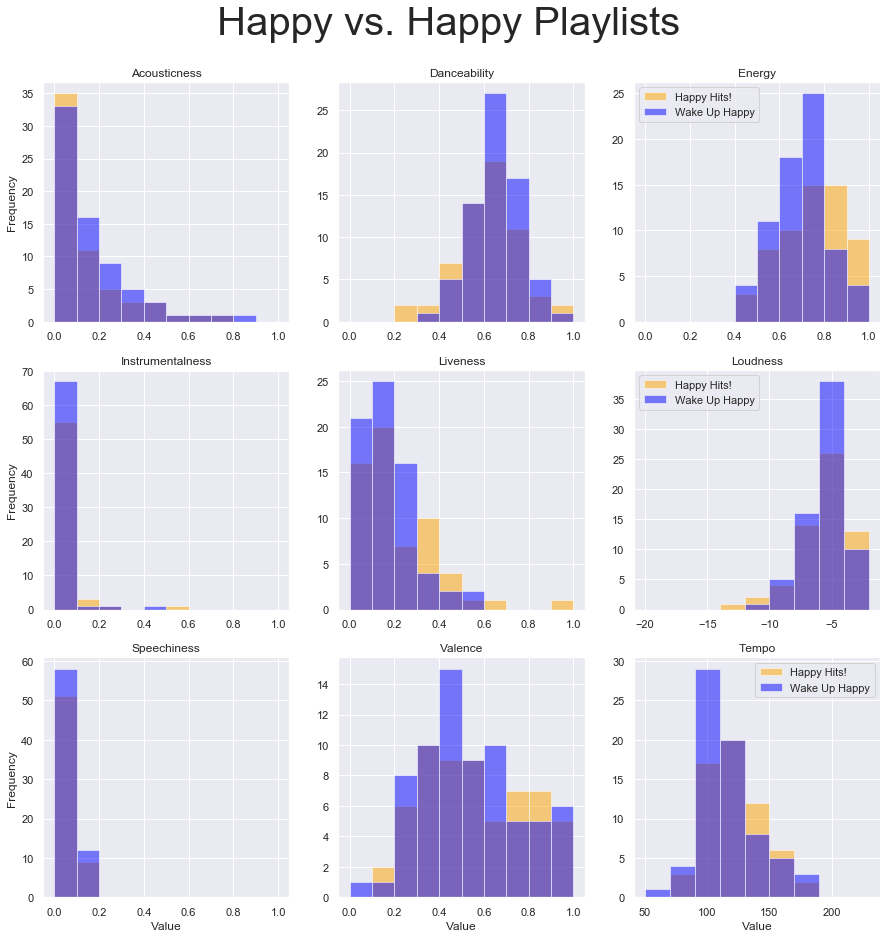

In [13]:
playlist_comparison_features_plots(df_happy1, df_happy2, 'Happy vs. Happy Playlists')

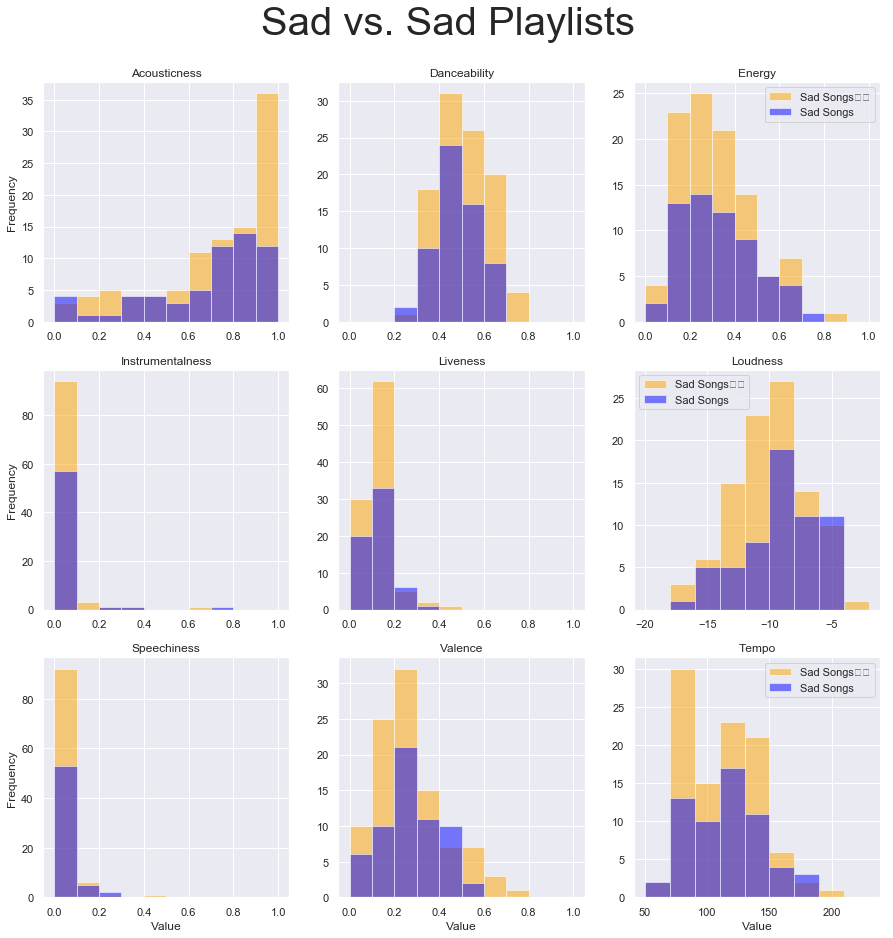

In [14]:
playlist_comparison_features_plots(df_sad1, df_sad2, 'Sad vs. Sad Playlists')

WIth the previous two figures, I compared similarly themed playlists. As you can see, there is not a lot to visually distinct the feature plots between the two chosen playlists in both of the comparisons. To note, in the 'Sad vs. Sad Playlists', one of the playlists has significantly more songs in it. However, the distributions of the values still look very similar and that's why I would classify that there there is not visual distinction between the two playlists.  

### Looking at the 'modes' of each playlist (major vs. minor key)

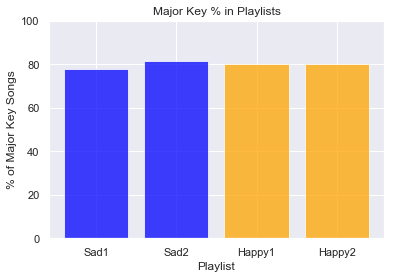

In [33]:
modes = []
modes.append(df_sad1['mode'].sum()/sum(df_sad1['mode'].value_counts()) * 100)
modes.append(df_sad2['mode'].sum()/sum(df_sad2['mode'].value_counts()) * 100)
modes.append(df_happy1['mode'].sum()/sum(df_happy1['mode'].value_counts()) * 100)
modes.append(df_happy2['mode'].sum()/sum(df_happy2['mode'].value_counts()) * 100)

playlists = ['Sad1', 'Sad2', 'Happy1', 'Happy2']

plt.bar(playlists, modes, color=['blue','blue','orange','orange'], alpha=0.75)
plt.ylim(0,100)
plt.xlabel('Playlist')
plt.ylabel('% of Major Key Songs')
plt.title('Major Key % in Playlists')
plt.show()

Initially, I thought there would be more differences in the percentage of major keys in playlists since a song with a major key usually has a more uplifting tone to it whereas a minor key has a more melancholy tone to it. Therefore, it may have been a good distinction between happy vs. sad playlists. The plot above seems to suggest that there is no difference between the happy and sad playlists with respect to the major key percentage.

### Looking at the explicitness of each playlist

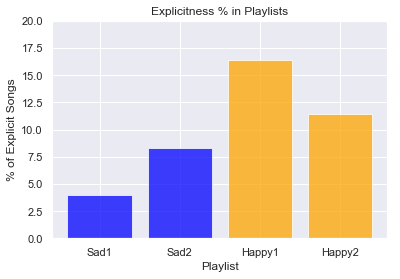

In [36]:
sad1_explicit = df_sad1['explicit'].value_counts()
sad2_explicit = df_sad2['explicit'].value_counts()
happy1_explicit = df_happy1['explicit'].value_counts()
happy2_explicit = df_happy2['explicit'].value_counts()

explicitness = []
explicitness.append(sad1_explicit[1]/(sad1_explicit[0] + sad1_explicit[1]) * 100)
explicitness.append(sad2_explicit[1]/(sad2_explicit[0] + sad2_explicit[1]) * 100)
explicitness.append(happy1_explicit[1]/(happy1_explicit[0] + sad1_explicit[1]) * 100)
explicitness.append(happy2_explicit[1]/(happy2_explicit[0] + happy2_explicit[1]) * 100)

playlists = ['Sad1', 'Sad2', 'Happy1', 'Happy2']

plt.bar(playlists, explicitness, color=['blue','blue','orange','orange'], alpha=0.75)
plt.ylim(0,20)
plt.xlabel('Playlist')
plt.ylabel('% of Explicit Songs')
plt.title('Explicitness % in Playlists')
plt.show()

In the figure above, it seems that there is more explicit songs in happy themed playlists than there is in sad playlists. However, this doesn't feel like a big difference so more testing and samples should be gained before any conclusions about the explicitness of playlists can be made. 

### Conclusions

By taking a look at differently and similarly themed playlists, we can see that it is possible to differentiate between two different playlists and playlists with the same theme have similar values. However, in order to complete the objective of the project, some more questions need to be asked:

* What of playlists of more questionable theme? I.e. a theme that is not easily described.
* How many songs does it take to instantiate a theme?
* There are features that can make a distinction between these two themes. However, that is not to say that these features would work for all themes. Is there a way to select the correct features for each theme?

The following sections will hopefully answer these questions.


## Exploratory Data Analysis

## Modeling